### Resultados simulaciones

Se revisan los resultados de las simulaciones con la red GRG (Graph Random Growth) con conectividades .1, .2, ..., .9, 1 y lose_shift = 0, latencia = 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos de las simulaciones con Numero_agentes:

In [2]:
names=['Identificador','Parametro-0','Parametro-1','Agente','Ronda','Estado','Puntaje','Politica_lag','Politica','Consistencia']
df_list = []
conectividades = [0.1 * x for x in range(1, 11)]
#conectividades = [0.02 * x for x in range(0, 5)] 
#conectividades = [0.02 * x for x in range(0, 5)] + [0.1 * x for x in range(1, 11)]
#conectividades = [round(x, 2) for x in conectividades]
#conectividades = [0.0, 0.5, 1]
#conectividades = [1]
print("Leyendo datos sweep conectividad:", conectividades)
for p in conectividades:
    archivo = "./data/simulaciones-GRG-" + str(p) + "-9-0" ".csv"
    print("Cargando datos de archivo", archivo, "...")
    try:
        aux = pd.read_csv(archivo, names=names, header=None)
        aux['Parametro-1'] = p
        df_list.append(aux)
        print("Listo")
    except:
        print("Archivo no existe! Saltando a siguiente opción")
        
data = pd.concat(df_list)
data = data.iloc[1:]
data.head()

Leyendo datos sweep conectividad: [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
Cargando datos de archivo ./data/simulaciones-GRG-0.1-9-0.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-0.2-9-0.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-0.30000000000000004-9-0.csv ...
Archivo no existe! Saltando a siguiente opción
Cargando datos de archivo ./data/simulaciones-GRG-0.4-9-0.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-0.5-9-0.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-0.6000000000000001-9-0.csv ...
Archivo no existe! Saltando a siguiente opción
Cargando datos de archivo ./data/simulaciones-GRG-0.7000000000000001-9-0.csv ...
Archivo no existe! Saltando a siguiente opción
Cargando datos de archivo ./data/simulaciones-GRG-0.8-9-0.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-0.9-9-0.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-1.

,Identificador,Parametro-0,Parametro-1,Agente,Ronda,Estado,Puntaje,Politica_lag,Politica,Consistencia
1,600,100,0.1,0,1,1,-1,7.0,7,1.0
2,600,100,0.1,0,2,1,1,7.0,7,1.0
3,600,100,0.1,0,3,1,1,7.0,7,1.0
4,600,100,0.1,0,4,1,-1,7.0,7,1.0
5,600,100,0.1,0,5,1,1,7.0,7,1.0


In [3]:
data = data.dropna()
data['Agente'] = data['Agente'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Politica'] = data['Politica'].astype(int)
data['Politica_lag'] = data['Politica_lag'].apply(lambda x: int(round(float(x), 0)))
data['Puntaje'] = data['Puntaje'].astype(int)
data.head()

,Identificador,Parametro-0,Parametro-1,Agente,Ronda,Estado,Puntaje,Politica_lag,Politica,Consistencia
1,600,100,0.1,0,1,1,-1,7,7,1.0
2,600,100,0.1,0,2,1,1,7,7,1.0
3,600,100,0.1,0,3,1,1,7,7,1.0
4,600,100,0.1,0,4,1,-1,7,7,1.0
5,600,100,0.1,0,5,1,1,7,7,1.0


### Verificamos correctitud de los datos

In [4]:
data.shape

(6930000, 10)

In [5]:
data['Parametro-1'].value_counts()

1.0    990000
0.5    990000
0.9    990000
0.4    990000
0.2    990000
0.8    990000
0.1    990000
Name: Parametro-1, dtype: int64

In [6]:
data['Agente'].value_counts()

99    69300
36    69300
26    69300
27    69300
28    69300
      ...  
69    69300
70    69300
71    69300
72    69300
0     69300
Name: Agente, Length: 100, dtype: int64

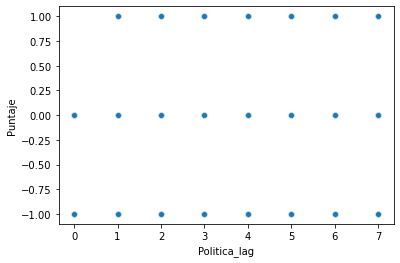

In [7]:
sns.scatterplot(x=data['Politica_lag'], y=data['Puntaje'], alpha=0.5)

**Asistencia**

Text(0, 0.5, 'Promedio asistencia ultimas rondas\nsobre 100 simulaciones')

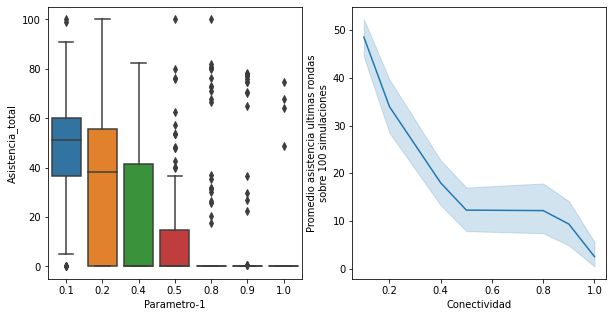

In [8]:
Numero_agentes = 100
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100 
rondas = aux['Ronda'].unique()
aux = aux[aux['Ronda'] > rondas[-5]]
aux = aux.groupby(['Parametro-1', 'Identificador'])['Asistencia_total']\
    .mean().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Asistencia_total']
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=aux['Parametro-1'], y=aux['Asistencia_total'], ax=ax[0])
sns.lineplot(x=aux['Parametro-1'], y=aux['Asistencia_total'], ax=ax[1])
plt.xlabel('Conectividad')
plt.ylabel('Promedio asistencia ultimas rondas\nsobre 100 simulaciones')

#### Asistencia óptima

Text(0, 0.5, 'Promedio asistencia óptima\nsobre 100 simulaciones')

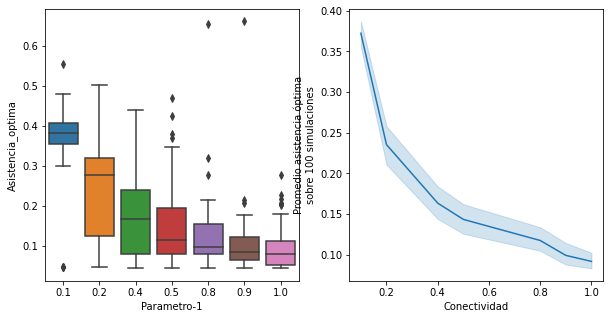

In [25]:
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/Numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (aux['Asistencia'] - 0.5)*(aux['Asistencia'] - 0.5)
num_rondas = aux.Ronda.max() + 1
df = aux.groupby(['Parametro-1', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = df['diferencia_con_umbral']/num_rondas
df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[0])
sns.lineplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[1])
plt.xlabel('Conectividad')
plt.ylabel('Promedio asistencia óptima\nsobre 100 simulaciones')

#### Recompensa total

In [26]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Parametro-1', 'Identificador', 'Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.groupby(['Parametro-1', 'Identificador'])['Puntaje normalizado'].mean().reset_index()
data_aux.head()

,Parametro-1,Identificador,Puntaje normalizado
0,0.1,600,0.615758
1,0.1,601,0.656364
2,0.1,602,0.711212
3,0.1,603,0.860909
4,0.1,604,0.724343


Text(0, 0.5, 'Puntaje NORMALIZADO promedio\n sobre 100 simulaciones')

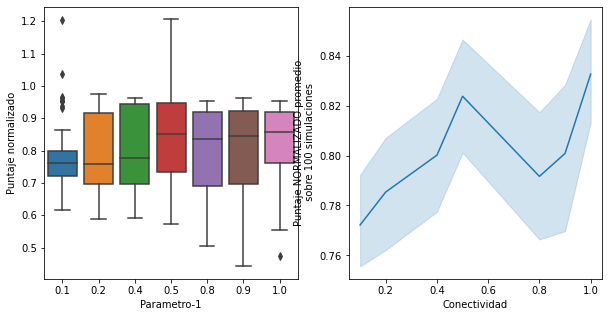

In [27]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[0]
#    hue=data_aux['Tipo_red']
)
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[1]
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Conectividad')
plt.ylabel('Puntaje NORMALIZADO promedio\n sobre 100 simulaciones')

#### Distribución de la recompensa

In [14]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 100
    return np.round(gini,3)

In [15]:
data_aux['Puntaje normalizado'].astype(float)
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
data_aux.head()

,Parametro-1,Identificador,Puntaje normalizado,Gini
0,0.1,6,0.903255,0.0
1,0.1,7,0.975657,0.0
2,0.1,8,0.939798,0.0
3,0.1,9,0.924545,0.0
4,0.1,10,0.464343,0.0


Text(0, 0.5, 'Índice de Gini')

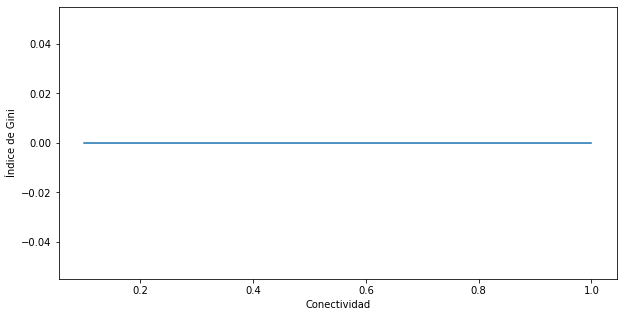

In [16]:
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
fig = plt.subplots(figsize=(10,5))
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Gini'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Conectividad')
plt.ylabel('Índice de Gini')

**Uso de políticas**

In [28]:
df = pd.DataFrame(data.groupby(['Parametro-1', 'Identificador', 'Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Parametro-1', 'Identificador', 'Ronda','Politica_lag', 'cantidad_agentes']
df = df.groupby(['Parametro-1', 'Ronda','Politica_lag'])['cantidad_agentes'].mean().reset_index()
df.head(2)

,Parametro-1,Ronda,Politica_lag,cantidad_agentes
0,0.1,1,0,13.01
1,0.1,1,1,12.59


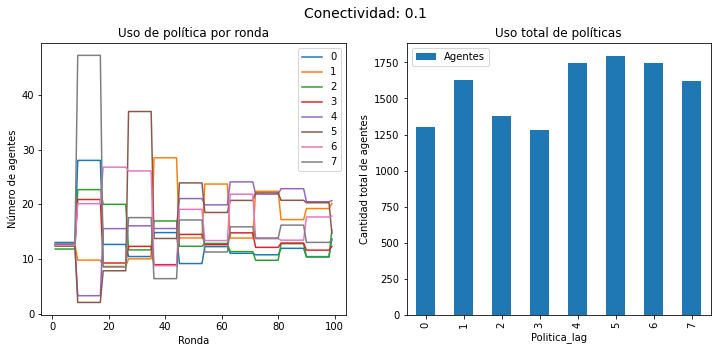

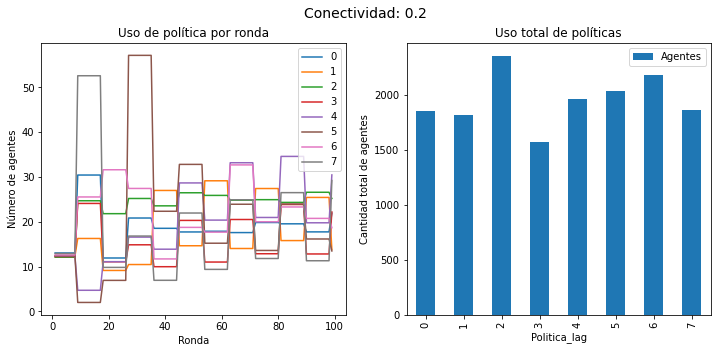

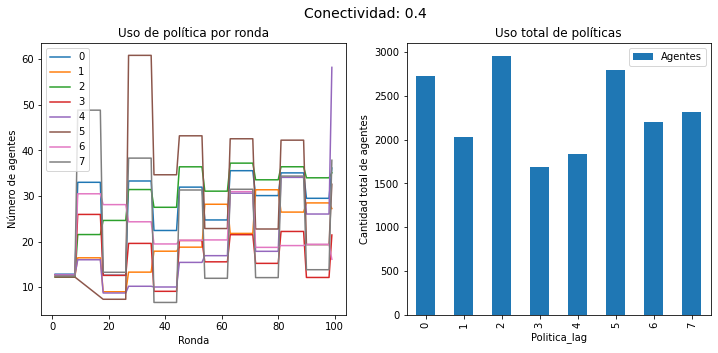

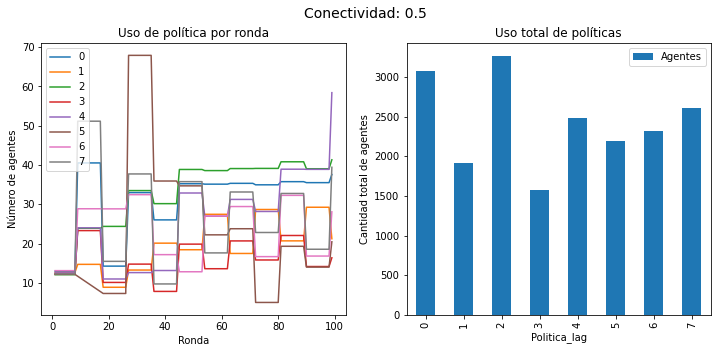

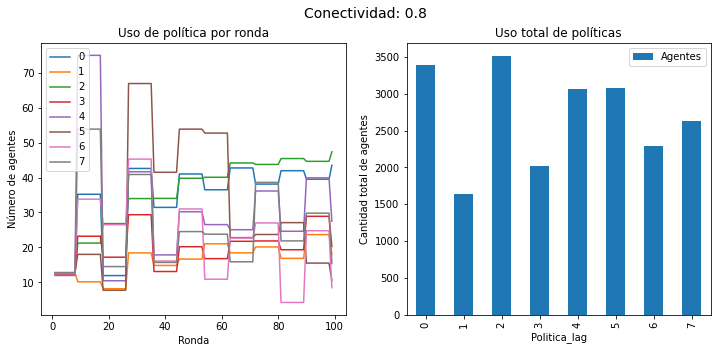

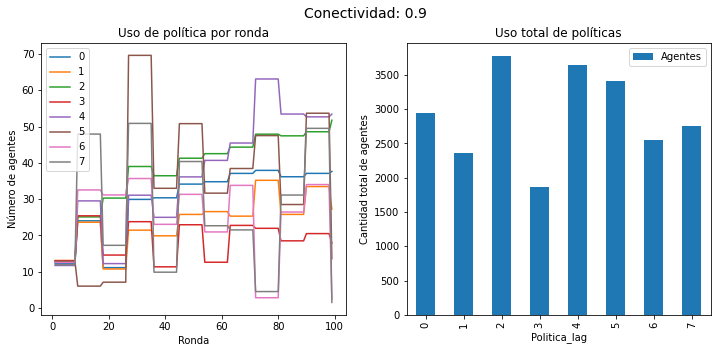

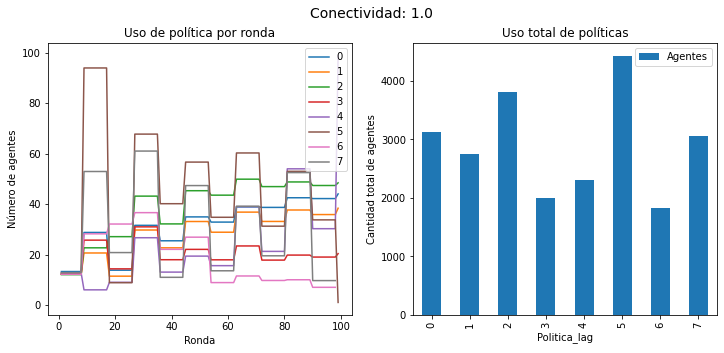

In [29]:
#sns.set_palette("Paired")
for r, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    #sns.lineplot(
    #            x=grp['Ronda'], 
    #            y=grp['cantidad_agentes'],
    #            hue=grp['Politica'],
    #            ax=ax[0]
    #        )
    for label, group in grp.groupby('Politica_lag'):
        group.plot(x='Ronda', y='cantidad_agentes', ax=ax[0],label=label)
    #ax[0].set_ylim([0,Num_agentes+1])
    ax[0].set_title('Uso de política por ronda')
    ax[0].set_ylabel('Número de agentes')
    df1 = pd.DataFrame(grp.groupby('Politica_lag')['cantidad_agentes'].sum())
    df1.columns = ['Agentes']
    #ax[1].plot(df.index, df['Agentes'])
    df1.plot(kind="bar", ax = ax[1])
    ax[1].set_title('Uso total de políticas')
    ax[1].set_ylabel('Cantidad total de agentes')
    fig.suptitle('Conectividad: ' + str(r), fontsize=14)

In [84]:
df = data.groupby(['Parametro-1', 'Politica_lag', 'Identificador'])['Puntaje'].mean().reset_index()
df.head()

,Parametro-1,Politica_lag,Identificador,Puntaje
0,0.0,0,6,0.0
1,0.0,0,7,0.0
2,0.0,0,8,0.0
3,0.0,0,9,0.0
4,0.0,0,10,0.0


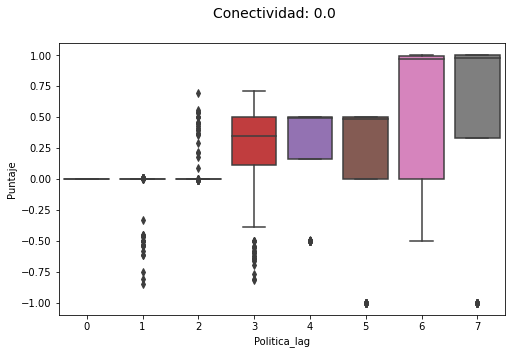

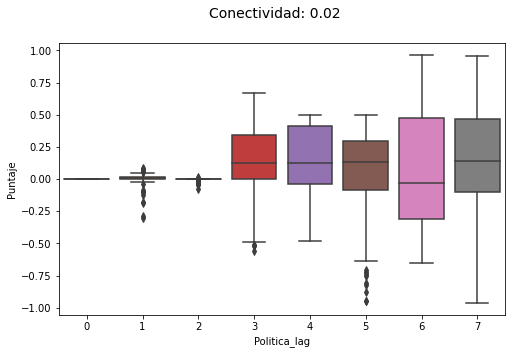

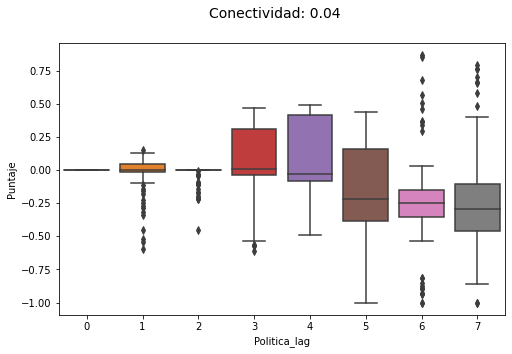

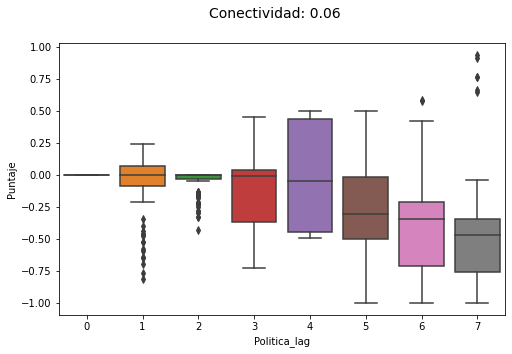

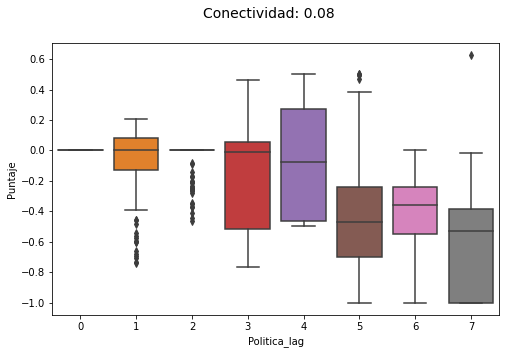

In [85]:
for p, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.boxplot(x=grp['Politica_lag'], y=grp['Puntaje'])
    fig.suptitle('Conectividad: ' + str(p), fontsize=14)

1. La conectividad influye en el comportamiento del sistema
* 
